# SaaS Subscription Revenue & Churn Analysis

## 1. Business Problem

Subscription-based SaaS companies depend on recurring revenue. 
Customer churn directly affects long-term profitability and revenue stability.

The objective of this analysis is to:
- Measure churn rate
- Analyze revenue impact
- Identify churn patterns
- Propose retention strategies


## Executive Summary

- Overall churn rate is 26.5%.
- 53% churn occurs within first 6 months.
- Month-to-month contracts show highest churn (~42%).
- 17.8% of total revenue is lost due to churn.
- Long-term contracts significantly reduce churn.

This indicates early lifecycle engagement and contract optimization are critical for reducing churn.


## 2. Import Libraries & Load Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../data/cleaned_telco_churn.csv")

df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0


## 3. Dataset Overview

We inspect the structure and understand the number of records and features.


In [2]:
df.shape


(7043, 31)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

## 4. Key Performance Indicators (KPIs)

We calculate:
- Total Customers
- Churn Rate
- Total Revenue
- Revenue Loss due to churn


In [3]:
total_customers = len(df)
churned_customers = df['Churn'].sum()

churn_rate = (churned_customers / total_customers) * 100

total_revenue = df['TotalCharges'].sum()
arpu = df['TotalCharges'].mean()

revenue_lost = df[df['Churn'] == 1]['TotalCharges'].sum()
revenue_loss_percentage = (revenue_lost / total_revenue) * 100

total_customers, churn_rate, total_revenue, revenue_lost, revenue_loss_percentage


(7043,
 np.float64(26.536987079369588),
 np.float64(16071540.924999999),
 np.float64(2862926.9),
 np.float64(17.813642844579945))

In [8]:
kpi_summary = pd.DataFrame({
    "Metric": [
        "Total Customers",
        "Churn Rate (%)",
        "Total Revenue",
        "Revenue Lost",
        "Revenue Loss (%)"
    ],
    "Value": [
        total_customers,
        round(churn_rate, 2),
        f"{total_revenue:,.2f}",
        f"{revenue_lost:,.2f}",
        round(revenue_loss_percentage, 2)
    ]
})

kpi_summary


,Metric,Value
0,Total Customers,7043
1,Churn Rate (%),26.54
2,Total Revenue,"16,071,540.92"
3,Revenue Lost,"2,862,926.90"
4,Revenue Loss (%),17.81


## 5. Churn Analysis by Tenure

We group customers based on subscription duration to understand early churn behavior.


In [5]:
bins = [0, 6, 12, 24, 48, 72]
labels = ['0-6', '6-12', '12-24', '24-48', '48+']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100
tenure_churn


Churn,0,1
tenure_group,,
0-6,46.666667,53.333333
6-12,64.113475,35.886525
12-24,71.289062,28.710938
24-48,79.611041,20.388959
48+,90.486824,9.513176


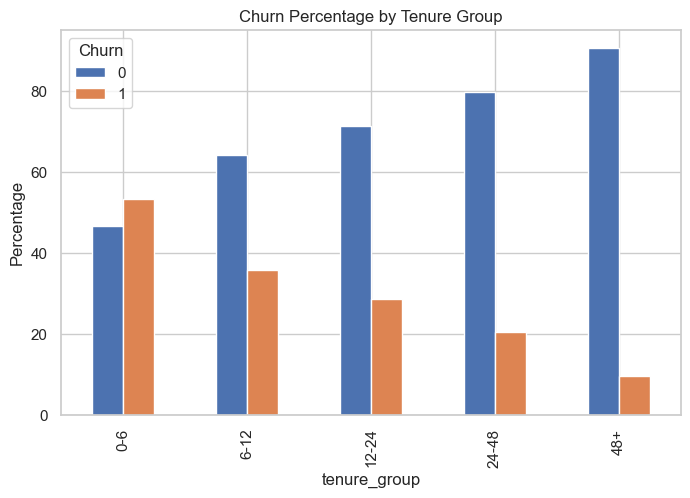

In [6]:
tenure_churn.plot(kind='bar', figsize=(8,5))
plt.title("Churn Percentage by Tenure Group")
plt.ylabel("Percentage")

plt.savefig("../images/churn_by_tenure.png", bbox_inches='tight')

plt.show()


## 6. Churn Analysis by Contract Type


In [7]:
def get_contract(row):
    if row['Contract_One year'] == 1:
        return 'One Year'
    elif row['Contract_Two year'] == 1:
        return 'Two Year'
    else:
        return 'Month-to-Month'

df['Contract_Type'] = df.apply(get_contract, axis=1)

contract_churn = pd.crosstab(df['Contract_Type'], df['Churn'], normalize='index') * 100
contract_churn


Churn,0,1
Contract_Type,,
Month-to-Month,57.290323,42.709677
One Year,88.730482,11.269518
Two Year,97.168142,2.831858


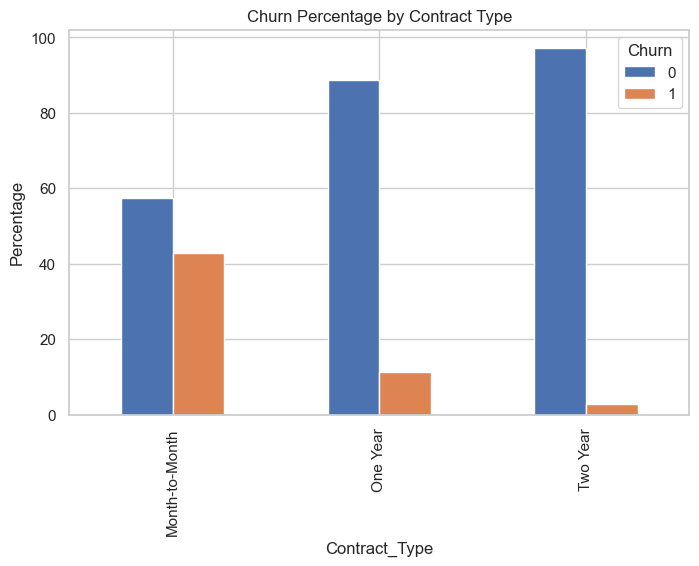

In [8]:
contract_churn.plot(kind='bar', figsize=(8,5))
plt.title("Churn Percentage by Contract Type")
plt.ylabel("Percentage")
plt.savefig("../images/churn_by_contract.png", bbox_inches='tight')
plt.show()


## 7. Pricing Impact Analysis

We analyze whether monthly subscription charges influence churn behavior.


In [9]:
df.groupby('Churn')['MonthlyCharges'].mean()


Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

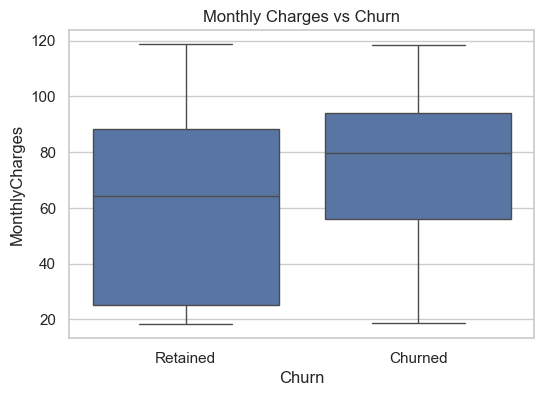

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xticks([0,1], ['Retained','Churned'])
plt.title("Monthly Charges vs Churn")
plt.savefig("../images/monthly_charges_vs_churn.png", bbox_inches='tight')
plt.show()


## 8. Revenue Impact Analysis


In [11]:
revenue_by_churn = df.groupby('Churn')['TotalCharges'].sum()

revenue_by_churn


Churn
0    1.320861e+07
1    2.862927e+06
Name: TotalCharges, dtype: float64

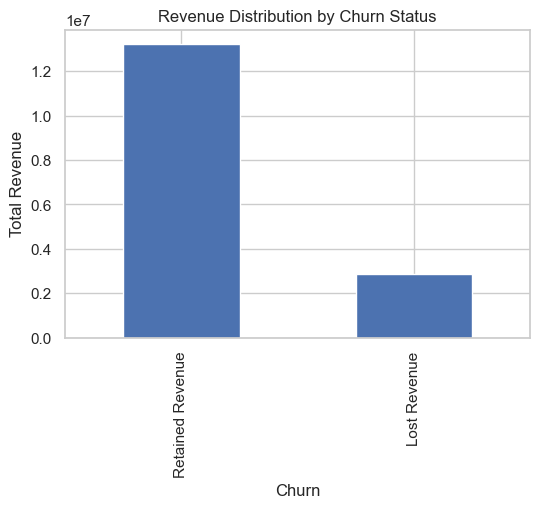

In [12]:
revenue_by_churn.plot(kind='bar', figsize=(6,4))
plt.xticks([0,1], ['Retained Revenue','Lost Revenue'])
plt.title("Revenue Distribution by Churn Status")
plt.ylabel("Total Revenue")
plt.savefig("../images/revenue_distribution.png", bbox_inches='tight')
plt.show()


## 9. Key Insights


-> Overall churn rate is approximately 26.5%.

-> Over 53% churn occurs within first 6 months.

-> Month-to-month contracts show highest churn (~42%).

-> Long-term contracts significantly reduce churn.

-> Churned customers pay higher monthly charges but leave earlier.

## 10. Business Recommendations

1. Improve onboarding experience within first 6 months.

2. Encourage customers to shift to long-term contracts.

3. Monitor high-paying month-to-month customers closely.

4. Implement early retention campaigns targeting new subscribers.


## 11. Conclusion

Churn is concentrated in early subscription stages and among low-commitment customers. 
Strategic retention efforts focusing on early lifecycle engagement and long-term contract adoption can significantly reduce churn and stabilize recurring revenue.
